### TAREFA

## **Ex1**: 
Analise e quantifique a relação da variável survived com a variável sex usando o conjunto de dados do titanic. Faça seus gráficos e calcule o chi-quadrado para quantificar a relação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Carregando os Dados

In [3]:
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2) Verificando o tipos das variaveis

In [4]:
print(df.Survived.dtype)
print(df.Sex.dtype)

int64
object


In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 3) Analise de Frequencia Absoluta e Relativa da Quantidade de Pessoas (Total) em Relação ao tipo de sexo

In [6]:
table = pd.DataFrame(df.Sex.value_counts())
table.rename(columns = {'Sex':'Absoluto'},inplace = True)
table['Relativa'] = round(table.Absoluto/table.Absoluto.sum(),2)
table.head()

,Absoluto,Relativa
male,577,0.65
female,314,0.35


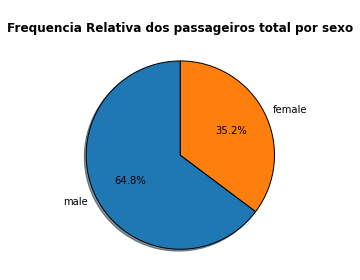

In [7]:
labels = df.Sex.unique()
plt.pie(df.Sex.value_counts()/df.shape[0],labels = labels, wedgeprops = {"edgecolor": 'black'}, shadow = True, startangle = 90, autopct="%1.1f%%")
plt.title("\nFrequencia Relativa dos passageiros total por sexo", {'fontweight':'bold'})
plt.tight_layout()
plt.show()

**Total de Homens no Navio: 577** <br>
**Total de Mulheres no Navio: 314**

**Probabilidade de ter Homens no Navio: 65%** <br>
**Probabilidade de ter Mulheres no Navio: 35%**

### 4) Inserindo a Coluna ASK para verificar quais passageiros sobreviveu apartir de uma variavel String

In [8]:
df['ASK'] = df.Survived.map({0:'Não Sobreviveu',1:'Sobreviveu'})

In [9]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ASK
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Não Sobreviveu
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Sobreviveu
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Sobreviveu
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Sobreviveu
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Não Sobreviveu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Não Sobreviveu
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Sobreviveu
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Não Sobreviveu
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Sobreviveu


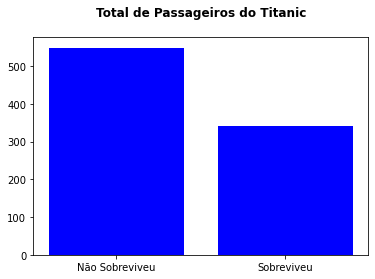

In [10]:
plt.bar(df.ASK.unique(), df.Survived.value_counts(), color = 'blue')
plt.title("Total de Passageiros do Titanic\n",{'fontweight':'bold'})
plt.show()

In [11]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

**Total de passageiros que sobreviveram: 549** <br>
**Total de passageiros que não sobreviveram: 342**



### 5) Analise de Frequencia Absoluta/ Quantidade de Pessoas por Sexo, verificando quantas sobreviveram

In [12]:
df.groupby(["Sex"]).apply(lambda x: x.ASK.value_counts()).unstack()

,Não Sobreviveu,Sobreviveu
Sex,,
female,81,233
male,468,109


### 6) Analise de Frequencia Relativa/ Quantidade de Pessoas por Sexo, verificando quantas sobreviveram

In [13]:
df.groupby(["Sex"]).apply(lambda x: round(x.ASK.value_counts()/x.ASK.shape[0],2)).unstack()

,Não Sobreviveu,Sobreviveu
Sex,,
female,0.26,0.74
male,0.81,0.19


### Frequencia Absoluta
**Total de passageiros Homens que sobreviveram: 109** <br>
**Total de passageiros Homens que não sobreviveram: 468**

**Total de passageiros Mulheres que sobreviveram: 233** <br>
**Total de passageiros Mulheres que não sobreviveram: 81**

### Frequencia Relativa
**Probabilidade de passageiros Homens que sobreviveram : 19%** <br>
**TProbabilidade de passageiros Homens que não sobreviveram : 81%**

**Probabilidade de passageiros Mulheres que sobreviveram : 74%** <br>
**Probabilidade de passageiros Mulheres que não sobreviveram : 26%**    
    

### 7) Grafico de Contagem e probabilidade de sobrevivencia por sexo

<AxesSubplot:xlabel='Sex', ylabel='Probability'>

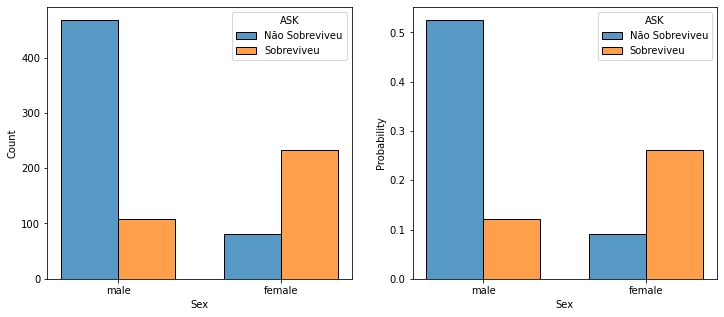

In [14]:
fig, axs = plt.subplots(1,2, figsize=[12,5])

sns.histplot(df, x='Sex', hue='ASK', stat ='count',multiple='dodge', shrink=0.7, ax=axs[0])
sns.histplot(df, x='Sex', hue='ASK', stat ='probability',multiple='dodge', shrink=0.7, ax=axs[1])

### 8) Calculo do chi-quadrado de pearson

In [42]:
def funcao_chi_quadrado(df,coluna1,coluna2):
    table = pd.DataFrame(round(df[coluna1].value_counts()/df.shape[0],2))
    table_absolute = df.groupby(coluna2).apply(lambda x: x[coluna1].value_counts()).unstack()
    table_relative = df.groupby(coluna2).apply(lambda x: x[coluna1].value_counts()/x.shape[0]).unstack()
    
    valor1 = (table_absolute.sum(axis=1)) * table.iloc[0].values
    valor2 = (table_absolute.sum(axis=1)) * table.iloc[1].values
    esperado = pd.DataFrame(np.c_[valor1,valor2])
    
    table_desvio = table_absolute.values - esperado.values
    table_ao_quadrado = table_desvio**2/esperado
    chi_quadrado = table_ao_quadrado.sum().sum()
    return print("CHI-QUADRADO DE PEARSON:",chi_quadrado)

In [16]:
funcao_chi_quadrado(df,"Survived","Sex")

CHI-QUADRADO DE PEARSON: 264.11838848422303


## Ex3: 
Use o dataframe df, carregado abaixo, onde  cada observação corresponde a uma reclamação feita 
pelo consumidor, para responder as perguntas abaixo:

1 - Qual o número de reclamações por Estado?<br>
2 - Qual a quantidade de reclamações por sexo?<br>
3 - O tempo de resposta tem alguma correlação com a nota do consumidor?<br>
4 - Proporção de reclamações registradas e não respondidas.<br>
5 - Imagine que você é alguém responsável por monitorar a satisfação dos consumidores. Que outros tipos de pergunta e análises você entende que poderiam ser feitas? Acrescente mais duas perguntas feitas por você, bem como suas análises para responde-las. 
**Importante**: É interessante que as análises contenham gráficos. No dia-a-dia de um cientista, grande parte do  trabalho é analisar dados e gerar visualizações para apresentá-las.

_fonte_ : https://dados.gov.br/dataset/reclamacoes-do-consumidor-gov-br1 (Nesse link estão os dicionário de dados, caso possua dúvidas sobre base).

### 1) Carregando os Dados

In [2]:
df_3 = pd.read_csv("dadosgovbr---2014.csv",sep = ';', encoding="latin-1")

In [3]:
df_3

,Gestor,Canal de Origem,Região,UF,Cidade,Sexo,Faixa Etária,Ano Abertura,Mês Abertura,Data Abertura,...,Como Comprou Contratou,Procurou Empresa,Respondida,Situação,Avaliação Reclamação,Nota do Consumidor,Análise da Recusa,Edição de Conteúdo,Interação do Gestor,Total
0,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Itaboraí,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Não comprei / contratei,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
1,Instituto Estadual de Proteção e Defesa do Con...,Não identificado,SE,ES,Serra,F,entre 31 a 40 anos,2014,6,11/06/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
2,Secretaria Nacional do Consumidor,Não identificado,SE,RJ,Volta Redonda,M,entre 31 a 40 anos,2014,6,27/06/2014,...,Internet,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
3,Instituto de Promoção e Defesa do Cidadão e Co...,Não identificado,NE,MA,São Luís,F,entre 31 a 40 anos,2014,5,29/05/2014,...,Não comprei / contratei,S,S,Finalizada avaliada,Resolvida,5.0,NaN,N,N,1
4,Secretaria de Desenvolvimento Social e Direito...,Não identificado,NE,PE,Recife,M,entre 21 a 30 anos,2014,6,30/06/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43982,Instituto de Defesa do Consumidor - Procon,Plataforma Web,CO,DF,Brasília,M,entre 31 a 40 anos,2014,12,01/12/2014,...,Internet,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1
43983,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Bernardo do Campo,M,entre 31 a 40 anos,2014,11,30/11/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
43984,Fundação de Proteção e Defesa do Consumidor,Plataforma Web,SE,SP,São Paulo,M,entre 31 a 40 anos,2014,12,26/12/2014,...,Internet,S,S,Finalizada avaliada,Não Resolvida,1.0,NaN,N,N,1
43985,Departamento de Proteção e Defesa do Consumido...,Plataforma Web,S,RS,Dona Francisca,M,mais de 70 anos,2014,12,09/12/2014,...,Loja física,S,S,Finalizada não avaliada,Não Avaliada,NaN,NaN,N,N,1


### 2) Verificado valores nulos e o tipo das variaveis

In [4]:
df_3.isnull().sum()[df_3.isnull().sum()>0]

Data Resposta            2026
Hora Resposta            2026
Data Análise            42034
Hora Análise            42034
Data Recusa             41921
Hora Recusa             41921
Prazo Analise Gestor    42034
Tempo Resposta           2026
Avaliação Reclamação     1834
Nota do Consumidor      15360
Análise da Recusa       41941
dtype: int64

In [5]:
df_3.dtypes

Gestor                     object
Canal de Origem            object
Região                     object
UF                         object
Cidade                     object
Sexo                       object
Faixa Etária               object
Ano Abertura                int64
Mês Abertura                int64
Data Abertura              object
Hora Abertura              object
Data Resposta              object
Hora Resposta              object
Data Análise               object
Hora Análise               object
Data Recusa                object
Hora Recusa                object
Data Finalização           object
Hora Finalização           object
Prazo Resposta             object
Prazo Analise Gestor      float64
Tempo Resposta            float64
Nome Fantasia              object
Segmento de Mercado        object
Área                       object
Assunto                    object
Grupo Problema             object
Problema                   object
Como Comprou Contratou     object
Procurou Empre

### 3) Número de reclamações por estado

In [6]:
df_3.groupby("UF").apply(lambda x: x.shape[0]).sort_values(ascending=False)

UF
SP    11882
PR     6140
RJ     4907
MG     4186
BA     2443
RS     1941
DF     1805
PE     1626
SC     1458
MA     1082
ES     1081
CE     1068
MT     1012
GO      886
MS      531
AC      449
PB      343
AM      291
PA      211
RN      160
RO      119
AL      104
SE       97
PI       77
TO       46
RR       24
AP       18
dtype: int64

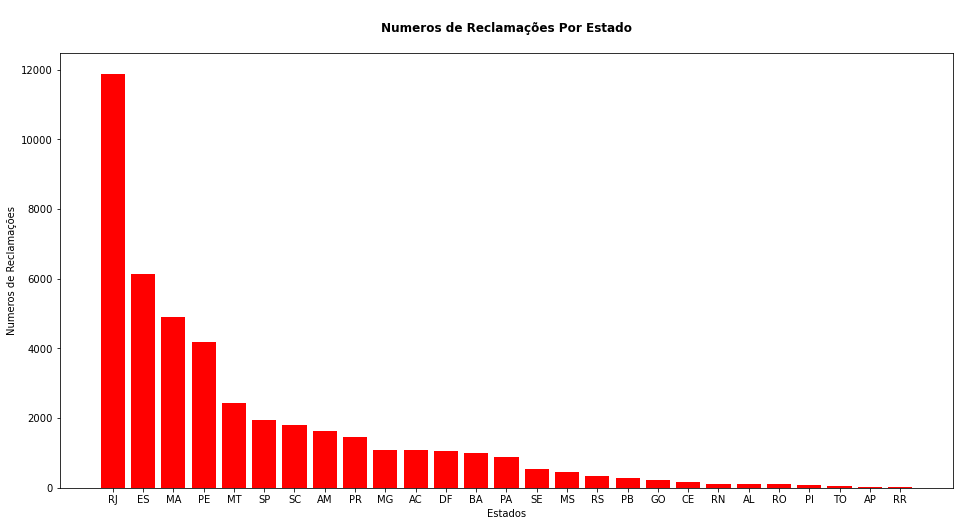

In [7]:
plt.figure(figsize=[16,8])
plt.bar(df_3.UF.unique(), df_3.UF.value_counts(),color="red")
plt.title("\nNumeros de Reclamações Por Estado\n",{'fontweight':'bold'})
plt.xlabel("Estados")
plt.ylabel("Numeros de Reclamações")
#plt.grid()
plt.show()

### 4) Número de reclamações por Sexo

In [24]:
df_3.groupby("Sexo").apply(lambda x: x.shape[0])

Sexo
F    16092
M    27895
dtype: int64

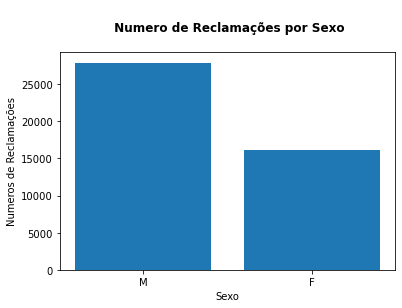

In [25]:
#plt.figure(figsize=[16,8])
plt.bar(df_3.Sexo.unique(),df_3.Sexo.value_counts())
plt.title("\n Numero de Reclamações por Sexo\n",{'fontweight':'bold'})
plt.xlabel("Sexo")
plt.ylabel("Numeros de Reclamações")
plt.show()

### 5) Verificação se o Tempo de Resposta tem correlação com a nota do consumidor

In [26]:
print(df_3['Tempo Resposta'].dtype)
print(df_3['Nota do Consumidor'].dtype)

float64
float64


**Tipo das variaveis: (Float,Float), a correlação é 2 variaveis quantitativas - Correlação Linear**

In [28]:
df_3.corr()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
Ano Abertura,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,NaN,1.000000,0.194573,-0.035776,0.073964,NaN
Prazo Analise Gestor,NaN,0.194573,1.000000,0.082552,-0.068360,NaN
Tempo Resposta,NaN,-0.035776,0.082552,1.000000,-0.187150,NaN
Nota do Consumidor,NaN,0.073964,-0.068360,-0.187150,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

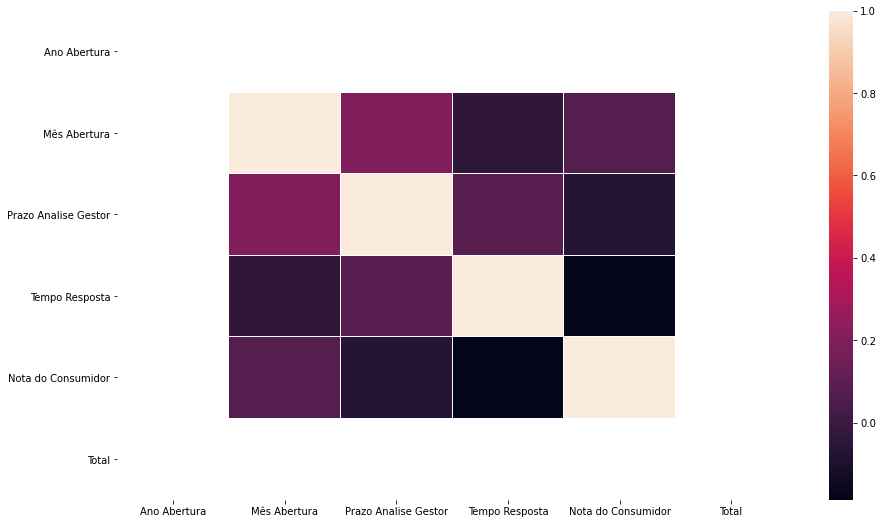

In [27]:
plt.figure(figsize=[15,9])
sns.heatmap(df_3.corr(),linewidths = 0.1)

**A Variavel tempo de resposta não tem relação direta com a nota do consumidor, o valor é -0.187150**

### 6) Verificação a Proporção de reclamações registradas e não respondidas

In [29]:
df_3['Respondida'].value_counts()

S    41961
N     2026
Name: Respondida, dtype: int64

In [41]:
df_3.groupby('Respondida').apply(lambda x: x['Avaliação Reclamação'].value_counts()).unstack()

,Não Avaliada,Não Resolvida,Resolvida
Respondida,,,
N,100,79,36
S,13426,11121,17391


In [47]:
df_3.groupby('Respondida').apply(lambda x: round(x['Avaliação Reclamação'].value_counts()/x.shape[0],2)).unstack()

,Não Avaliada,Não Resolvida,Resolvida
Respondida,,,
N,0.05,0.04,0.02
S,0.32,0.27,0.41


*Não foi Respondida e não Avaliada: 5%* <br>
*Não foi Respondida e não Resolvida: 4%*  <br>
*Não foi Respondida e foi Resolvida: 2%*  <br>

*Foi Respondida e não Avaliada: 32%* <br>
*Foi Respondida e não Resolvida: 27%* <br>
*Foi Respondida e Resolvida: 41%* 

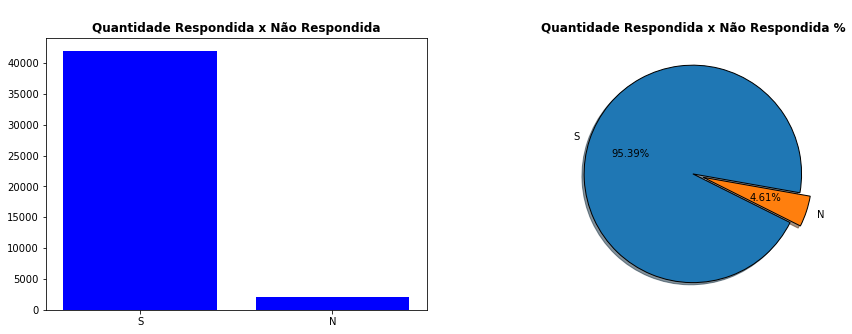

In [48]:
labels = df_3.Respondida.unique()
explode = [0,0.1]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title("\nQuantidade Respondida x Não Respondida",{'fontweight':'bold'})
plt.bar(labels,df_3["Respondida"].value_counts(),color='blue')
plt.subplot(1,2,2)
plt.title("\nQuantidade Respondida x Não Respondida %",{'fontweight':'bold'})
plt.pie(df_3['Respondida'].value_counts(), labels=labels ,shadow = True, startangle=-10 , explode=explode, wedgeprops = {"edgecolor": 'black'} ,autopct='%.2f%%')
plt.show()

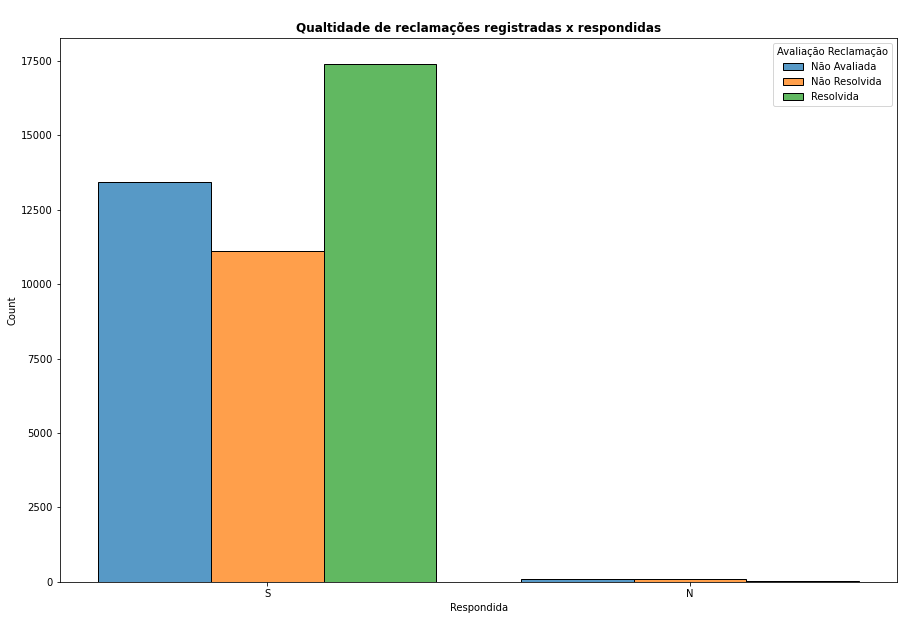

In [18]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_3, x='Respondida', hue='Avaliação Reclamação', stat='count', multiple='dodge',shrink=0.8)
plt.title("\nQualtidade de reclamações registradas x respondidas",{'fontweight':'bold'})
plt.show()

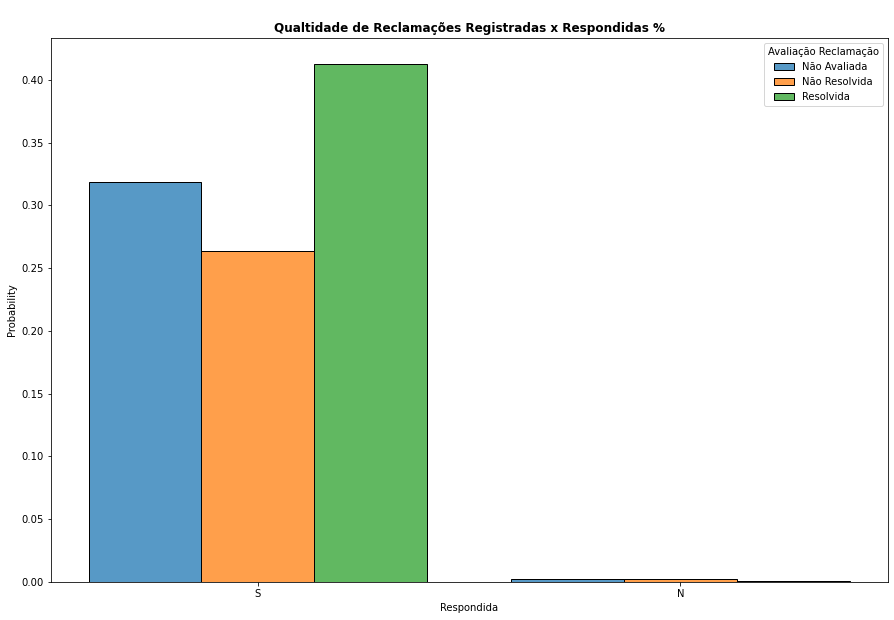

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(data=df_3, x='Respondida', hue='Avaliação Reclamação', stat='probability', multiple='dodge',shrink=0.8)
plt.title("\nQualtidade de Reclamações Registradas x Respondidas %",{'fontweight':'bold'})
plt.show()

In [28]:
df_3.corr()

,Ano Abertura,Mês Abertura,Prazo Analise Gestor,Tempo Resposta,Nota do Consumidor,Total
Ano Abertura,NaN,NaN,NaN,NaN,NaN,NaN
Mês Abertura,NaN,1.000000,0.194573,-0.035776,0.073964,NaN
Prazo Analise Gestor,NaN,0.194573,1.000000,0.082552,-0.068360,NaN
Tempo Resposta,NaN,-0.035776,0.082552,1.000000,-0.187150,NaN
Nota do Consumidor,NaN,0.073964,-0.068360,-0.187150,1.000000,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN


## 5) Estudo da Satisfação dos consumidores

### **Faixa Etaria pelo Canal de Origem**

h0 = a faixa etaria tem relação direta com o canal de origem <br>
h1 = a faixa etaria não tem relação direta com o canal de origem

### **Faixa Etaria pela nota do consumidor**

h0 = a faixa etaria tem relação direta com a nota do consumidor <br>
h1 = a faixa etaria não tem relação direta com a nota do consumidor

### **Mês de abertura pela avaliação do consumidor**

h0 = o mes de abertura tem relação direta com a avaliação do consumidor <br>
h1 = o mes de abertura não tem relação direta com a avaliação do consumidor

### **Mês de abertura pela Respondida**

h0 = o mes de abertura tem relação direta com a respondida <br>
h1 = o mes de abertura não tem relação direta com a respondida

In [34]:
df_3.isnull().sum()[df_3.isnull().sum()>0]

Data Resposta            2026
Hora Resposta            2026
Data Análise            42034
Hora Análise            42034
Data Recusa             41921
Hora Recusa             41921
Prazo Analise Gestor    42034
Tempo Resposta           2026
Avaliação Reclamação     1834
Nota do Consumidor      15360
Análise da Recusa       41941
dtype: int64

In [35]:
df_3['Avaliação Reclamação'].value_counts().sort_values(ascending=False)

Resolvida        17427
Não Avaliada     13526
Não Resolvida    11200
Name: Avaliação Reclamação, dtype: int64

In [36]:
df_3['Respondida'].value_counts().sort_values(ascending=False)

S    41961
N     2026
Name: Respondida, dtype: int64

In [37]:
df_3['Nota do Consumidor'].value_counts().sort_values(ascending=False)

1.0    9904
5.0    8789
4.0    4309
3.0    3747
2.0    1878
Name: Nota do Consumidor, dtype: int64

In [38]:
df_4 = df_3.copy()
df_4['order'] = df_3["Faixa Etária"].map({'entre 31 a 40 anos':2, 'entre 21 a 30 anos':1, 'entre 51 a 60 anos':4,
    'entre 41 a 50 anos':3, 'entre 61 a 70 anos':5, 'mais de 70 anos':6,'até 20 anos':0})

df_4['Canal'] = df_3["Canal de Origem"].map({'Não identificado':0,'Plataforma Web':1})
df_4['Avaliação'] = df_3["Avaliação Reclamação"].map({'Não Avaliada':0,'Não Resolvida':1,'Resolvida':2})

df_4.sort_values(by=['order'],ascending =[True], inplace = True)

In [39]:
df_4['Avaliação'].value_counts().sort_values(ascending=False)

2.0    17427
0.0    13526
1.0    11200
Name: Avaliação, dtype: int64

In [40]:
df_4['Canal'].value_counts().sort_values(ascending=False)

1    22156
0    21831
Name: Canal, dtype: int64

## 1) Plotando a Faixa Etária dos consumidores

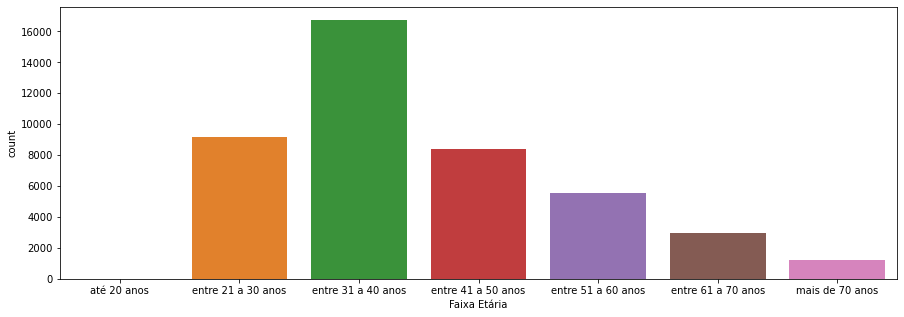

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_4, x='Faixa Etária')
plt.show()

*Podemos observar que a maioria são de 31 a 40 anos*

## 2) Plotando a Faixa Etária por Canal de Origem

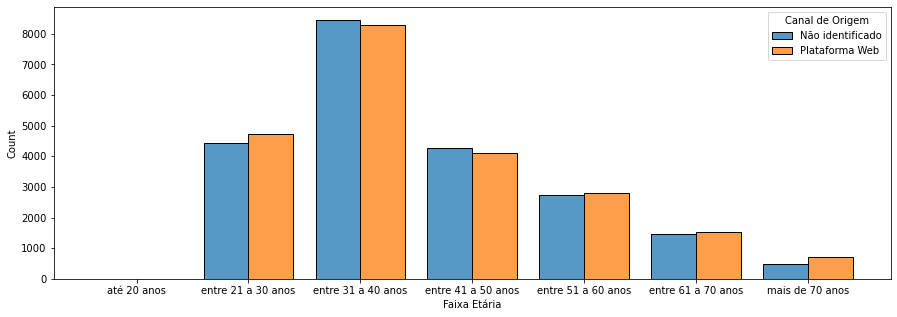

In [164]:
plt.figure(figsize=(15,5))
sns.histplot(data=df_4, x='Faixa Etária', hue='Canal de Origem', stat='count', multiple='dodge',shrink=0.8)
plt.show()

In [48]:
df_4.groupby("Canal").apply(lambda x: x['Faixa Etária'].value_counts()/x.shape[0])

Faixa Etária,entre 31 a 40 anos,entre 21 a 30 anos,entre 41 a 50 anos,entre 51 a 60 anos,entre 61 a 70 anos,mais de 70 anos,até 20 anos
Canal,,,,,,,
0,0.387018,0.202922,0.195090,0.125830,0.066236,0.022628,0.000275
1,0.374255,0.213215,0.185277,0.126151,0.068920,0.031820,0.000361


In [43]:
funcao_chi_quadrado(df_4,'Canal','Faixa Etária')

CHI-QUADRADO DE PEARSON: 53.79037508196918


*Podemes observar que independente da idade, a busca pela ferramenta web é alta*<br>
*o chi-quadrado de pearson deu 53,79, ou seja, possui uma media relação entre as variaveis*


## 3) Plotando a Faixa Etária pela Nota do Consumidor

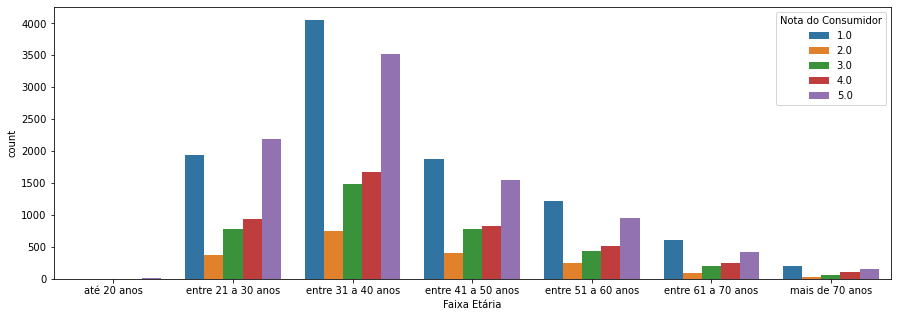

In [19]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_4, x='Faixa Etária', hue='Nota do Consumidor')
plt.show()

In [45]:
var_global = np.var(df_4['Nota do Consumidor'])

var_categ = df_4.groupby(['Faixa Etária']).apply(lambda x: np.var(x['Nota do Consumidor']))
total_categ = df_4['Faixa Etária'].value_counts()
    
var = total_categ * var_categ
var1 = var.sum()/total_categ.sum()
    
x = (var_global - var1)/ var_global
r_quad = round(x*100,2)

In [46]:
r_quad

0.34

*No Grafico da Faixa Etaria x Nota do Consumidor, podemos observar que em todas as idades,<br> 
as notas mais utilizadas foram a pior nota e a melhor nota, ou seja 1 e 5*
<br><br>
*O publico mais jovem dos 21 aos 40 anos, estão muito mais insatisfeito com o serviço prestado*
<br><br>
*A correlação entre a variavel nota do consumidor x faixa etária é muito baixa: 0.34.*

## 4) Plotando a Mês Abertura pela Avaliação do Consumidor


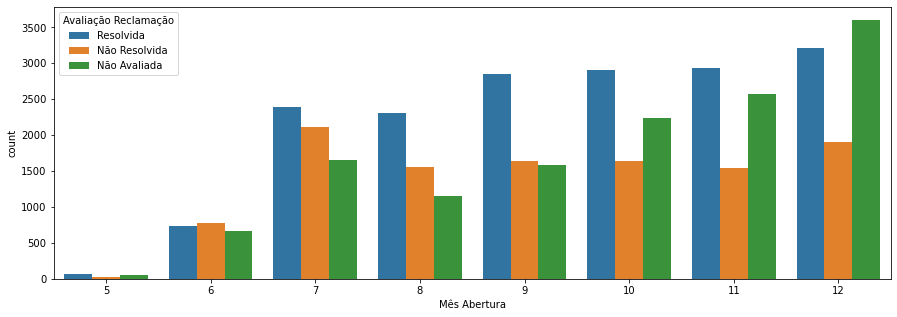

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_4, x='Mês Abertura', hue='Avaliação Reclamação')
plt.show()

In [49]:
var_global = np.var(df_4['Mês Abertura'])

var_categ = df_4.groupby(['Avaliação Reclamação']).apply(lambda x: np.var(x['Mês Abertura']))
total_categ = df_4['Avaliação Reclamação'].value_counts()
    
var = total_categ * var_categ
var1 = var.sum()/total_categ.sum()
    
x = (var_global - var1)/ var_global
r_quad2 = round(x*100,2)

In [50]:
r_quad2

1.0

*Correlação de 1%*

## 5) Plotando a Mês Abertura pela Respondida

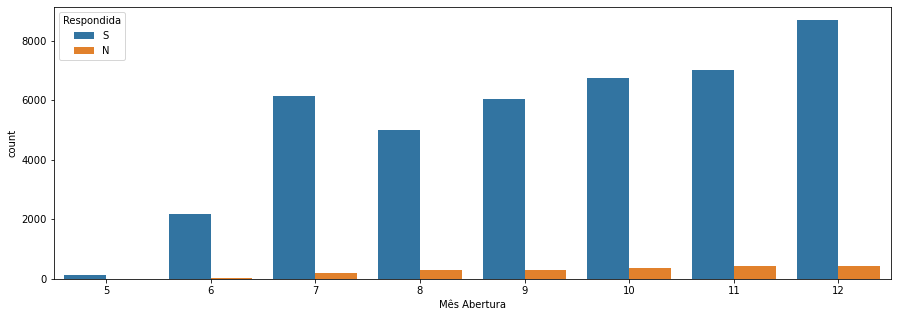

In [158]:
plt.figure(figsize=(15,5))
sns.countplot(data=df_4, x='Mês Abertura', hue='Respondida')
plt.show()

In [51]:
var_global = np.var(df_4['Mês Abertura'])

var_categ = df_4.groupby(['Respondida']).apply(lambda x: np.var(x['Mês Abertura']))
total_categ = df_4['Respondida'].value_counts()
    
var = total_categ * var_categ
var1 = var.sum()/total_categ.sum()
    
x = (var_global - var1)/ var_global
r_quad3 = round(x*100,2)

In [52]:
r_quad3

0.09

*Correlação de 0,09%*

## Conclusão

**Nos 2 ultimos graficos, é possivel observar que no mês 7 houve um aumento de avaliação resolvida, pode ser que houve uma grande contratação na empresa, assim houve uma melhora significativa no atendimento, mas ao decorrer dos meses, houve uma grande quantidade de atendimento não resolvida, isso pode ser possivel devida ao aumento de demanda, assim pode se verificar que o setor esta trabalhando em seu ritmo maximo**